In [1]:
import math
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

from scipy import stats


# Load Data

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# EDA

## Statistical Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Histogram

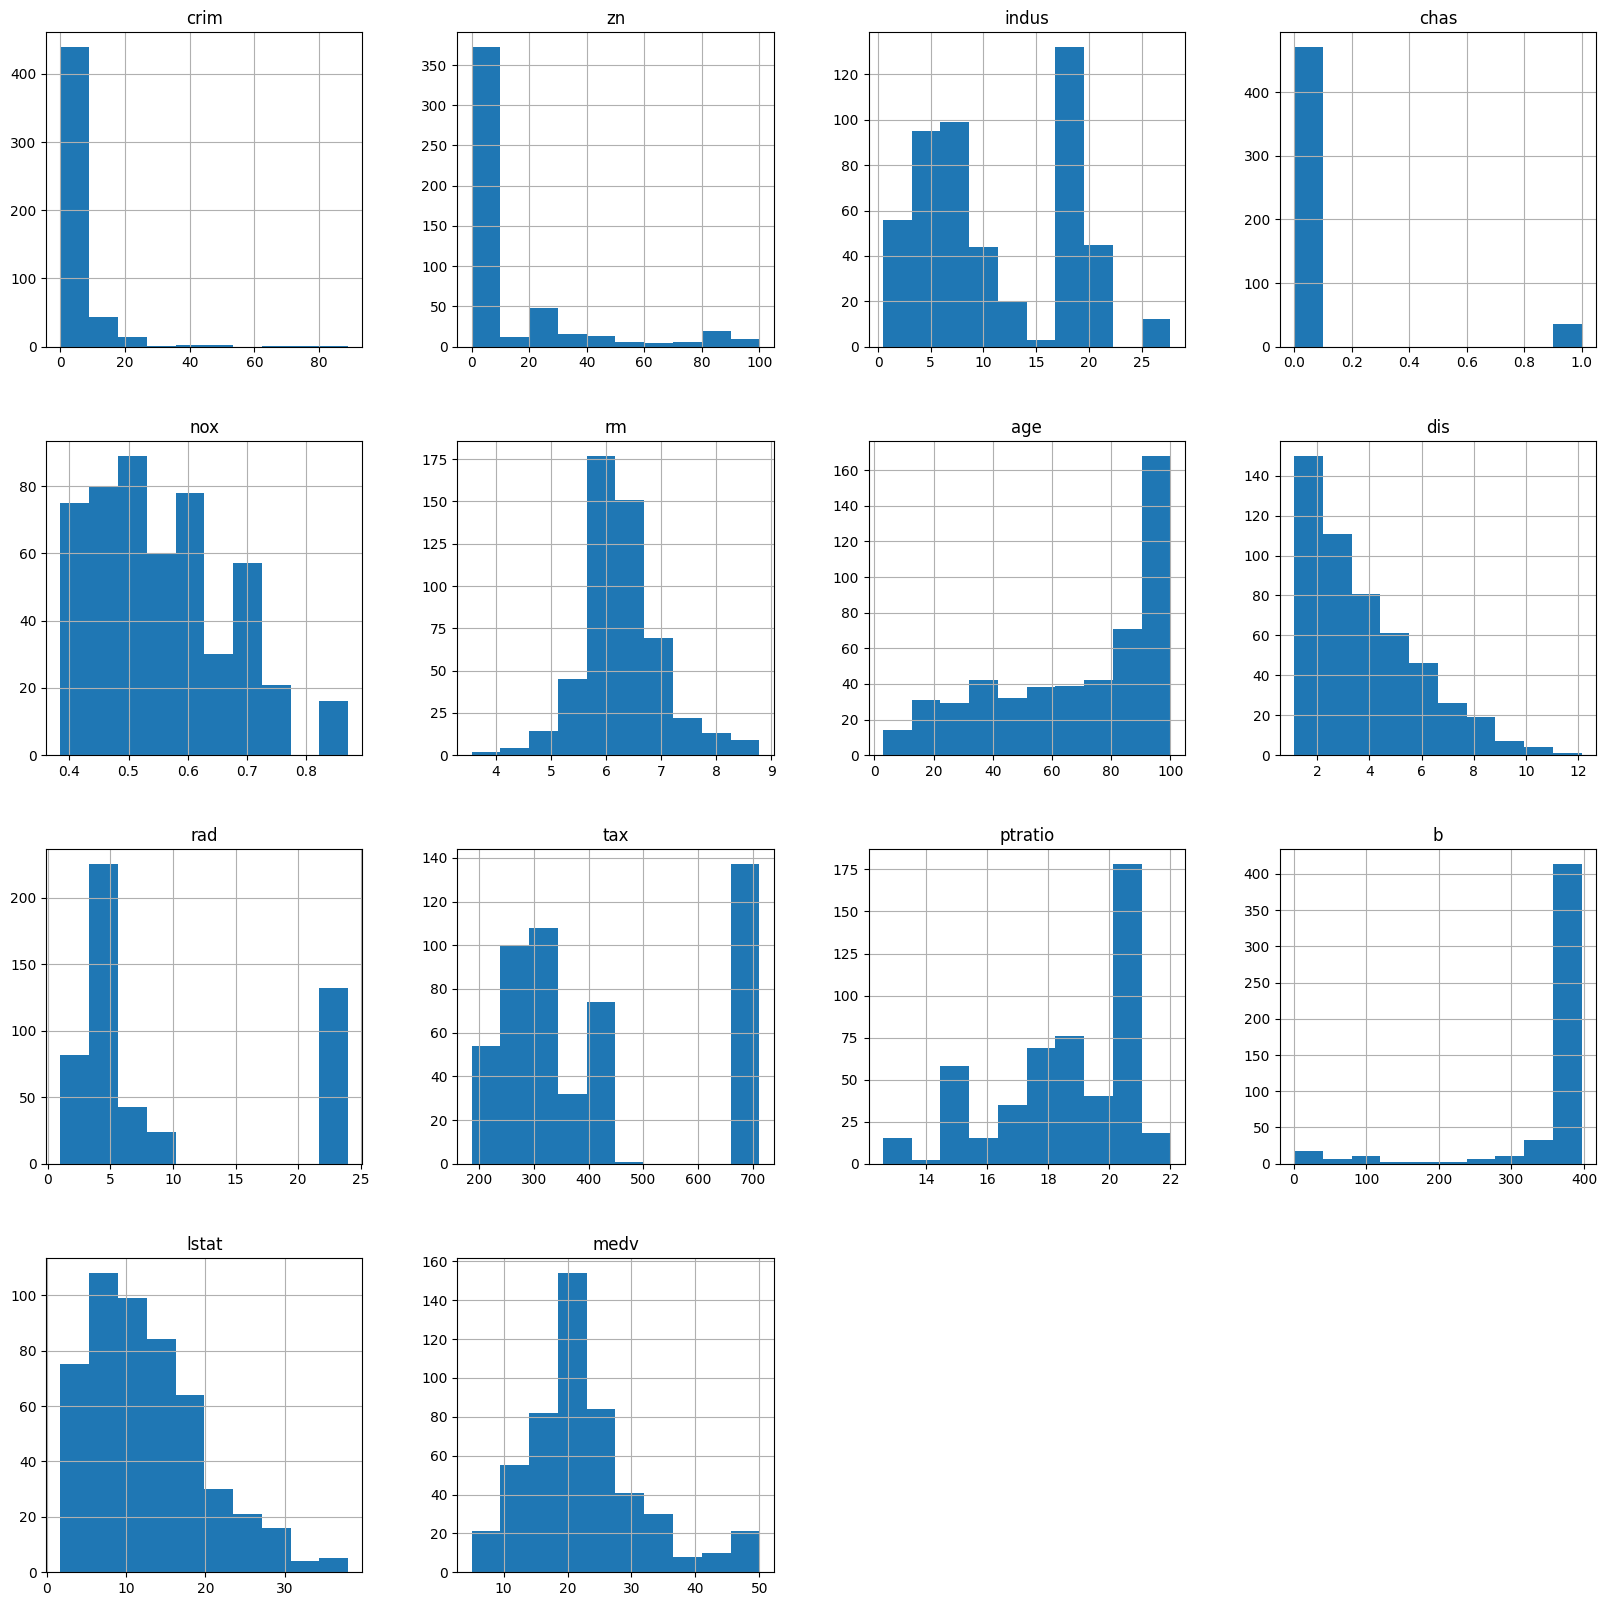

In [5]:
plot = df.hist(figsize = (20,20))

### Pairplot

c:\Users\louis\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


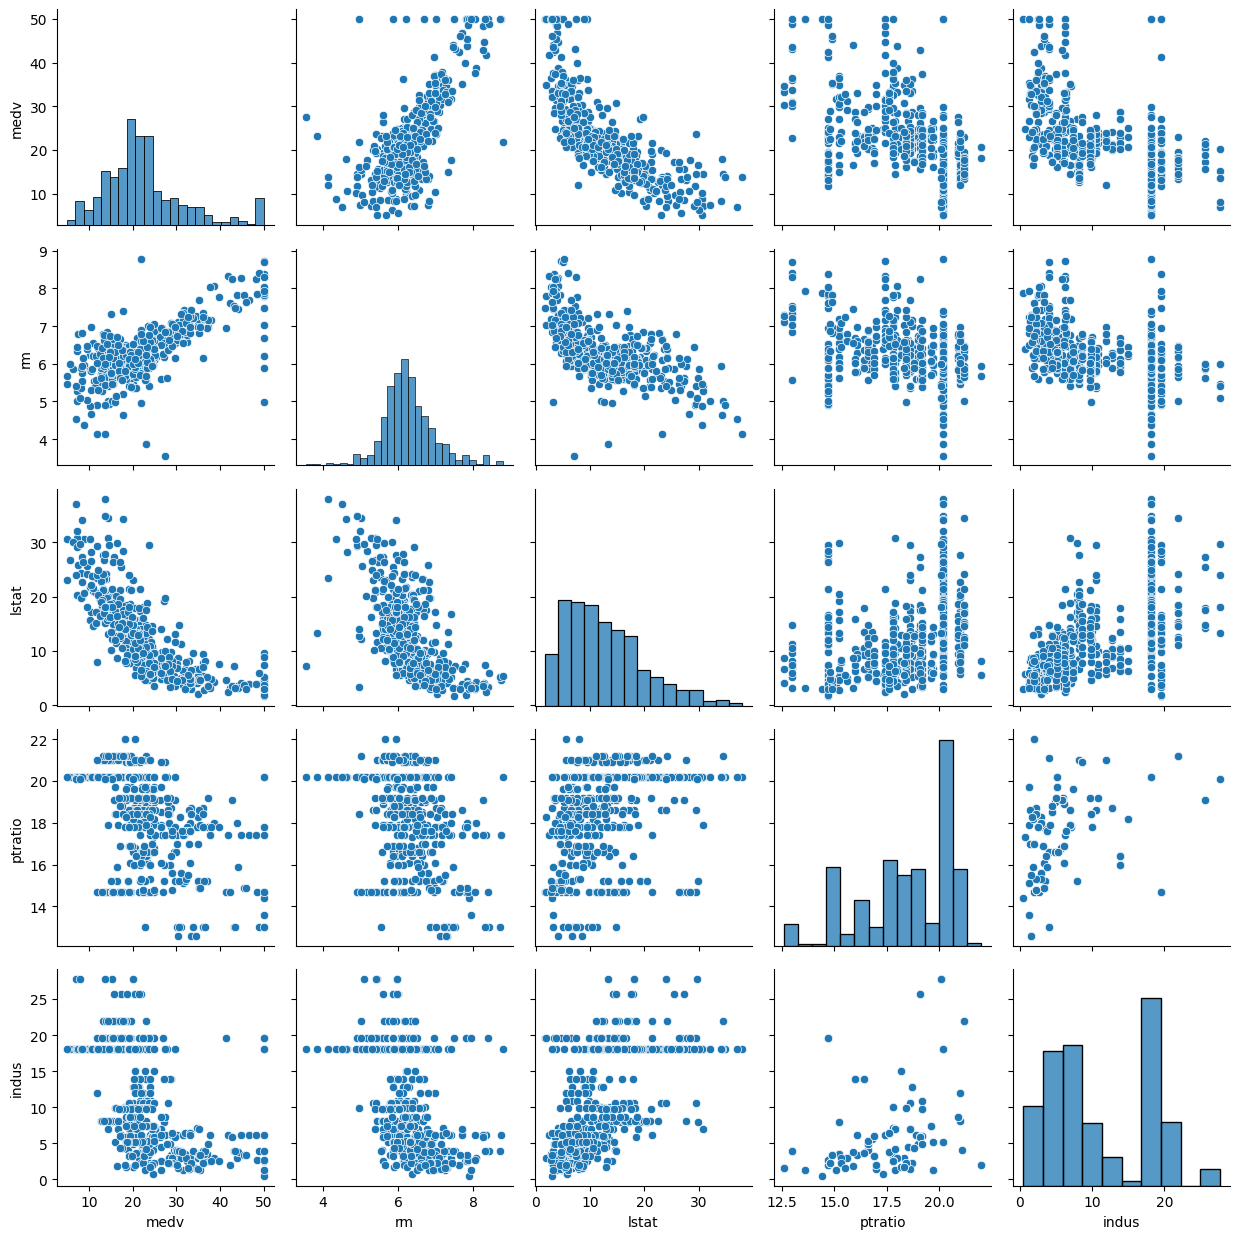

In [6]:
# Calculate and show pairplot
sns.pairplot(df[['medv', 'rm','lstat','ptratio','indus']], size=2.5)
plt.tight_layout()

## Correlation Heatmap

<Axes: >

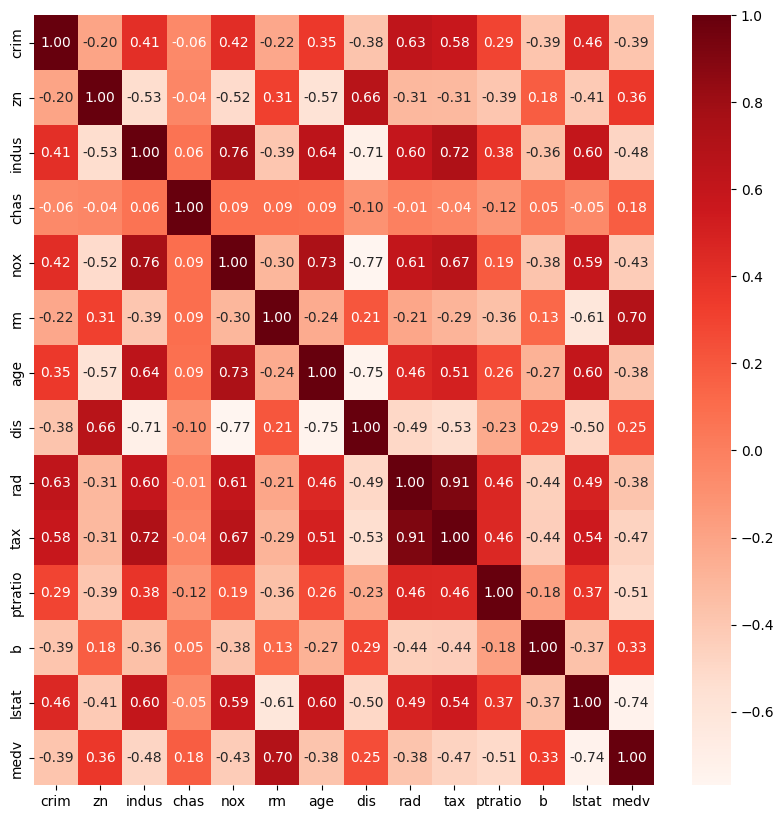

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Reds", annot=True, fmt=".2f")

In [8]:
df[df.columns[0:]].corr()['medv'][:].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

# Data Preparation

## Check Duplication

In [9]:
print(df.duplicated().sum())

0


## Outliers

In [10]:
z = np.abs(stats.zscore(df))
print(z)

         crim        zn     indus      chas       nox        rm       age  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          dis       rad       tax   ptratio         b     lstat      medv  

In [11]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [12]:
df_boston = df[(z < 3).all(axis=1)]
df_boston.shape

(415, 14)

In [13]:
df.shape

(506, 14)

In [14]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,415.0,2.452461,4.897241,0.00632,0.081005,0.21161,2.152115,28.6558
zn,415.0,9.602410,19.677404,0.00000,0.000000,0.00000,12.500000,80.0000
indus,415.0,10.829687,6.798613,0.46000,5.130000,8.56000,18.100000,27.7400
chas,415.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000
nox,415.0,0.547168,0.110428,0.38500,0.449000,0.52400,0.609000,0.8710
rm,415.0,6.267554,0.611602,4.36800,5.886000,6.19300,6.559500,8.3370
age,415.0,67.384337,28.072043,2.90000,43.550000,73.90000,93.700000,100.0000
dis,415.0,3.852640,1.964763,1.16910,2.203200,3.37790,5.287300,9.2229
rad,415.0,8.684337,8.196802,1.00000,4.000000,5.00000,8.000000,24.0000
tax,415.0,393.853012,161.196133,188.00000,279.000000,315.00000,437.000000,711.0000


## Normalization

In [16]:
features = df_boston.drop('medv', axis=1)
labels = df_boston['medv']

In [17]:
ss = StandardScaler()
mm = MinMaxScaler()
features_ss = ss.fit_transform(features)
features_mm = mm.fit_transform(features)

In [18]:
features_ss.shape

(415, 13)

In [19]:
labels.shape

(415,)

In [20]:
print('Cross Val Score for Standard Scaler: ')
result = cross_val_score(RandomForestRegressor(), features_ss, labels, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for Standard Scaler: 
0.6630997321331207


In [21]:
print('Cross Val Score for MinMax Scaler: ')
result = cross_val_score(RandomForestRegressor(), features_mm, labels, cv=5, n_jobs=-1)
print(np.mean(result))

Cross Val Score for MinMax Scaler: 
0.6608371785321177


In [22]:
X = pd.DataFrame(features_ss, columns=features.columns)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.500097,0.427278,-1.254663,0.0,-0.083120,0.503296,-0.077906,0.120954,-0.938612,-0.607776,-1.483794,0.439914,-1.128221
1,-0.495805,-0.488581,-0.553675,0.0,-0.708718,0.251194,0.410713,0.567909,-0.816465,-0.943176,-0.312853,0.439914,-0.484935
2,-0.495810,-0.488581,-0.553675,0.0,-0.708718,1.501880,-0.224135,0.567909,-0.816465,-0.943176,-0.312853,0.360916,-1.275125
3,-0.494771,-0.488581,-1.273808,0.0,-0.808451,1.195757,-0.769819,1.125951,-0.694319,-1.067398,0.108686,0.395854,-1.443679
4,-0.487272,-0.488581,-1.273808,0.0,-0.808451,1.439673,-0.470228,1.125951,-0.694319,-1.067398,0.108686,0.439914,-1.074098


In [23]:
features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Feature Selection

### LASSO

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [26]:
pipeline = Pipeline([
                     ('model',Lasso())
])

In [27]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [28]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-28.919 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-17.302 total time=   0.0s
[CV 3/5] END ................model__alpha=0.1;, score=-18.817 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-10.629 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-33.492 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-28.802 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-18.397 total time=   0.0s
[CV 3/5] END ................model__alpha=0.2;, score=-19.800 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-9.660 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-33.657 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-28.897 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
search.best_params_

{'model__alpha': 0.1}

In [30]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients 

array([-2.20124813e-01, -6.65630229e-04, -6.37747669e-02,  0.00000000e+00,
       -7.60703697e-01,  3.12599908e+00, -2.84742691e-01, -1.73977682e+00,
        3.89492204e-01, -8.46008903e-01, -1.72617578e+00,  1.21849320e-01,
       -3.14594490e+00])

In [31]:
importance = np.abs(coefficients)

In [32]:
importance

array([2.20124813e-01, 6.65630229e-04, 6.37747669e-02, 0.00000000e+00,
       7.60703697e-01, 3.12599908e+00, 2.84742691e-01, 1.73977682e+00,
       3.89492204e-01, 8.46008903e-01, 1.72617578e+00, 1.21849320e-01,
       3.14594490e+00])

In [33]:
label = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']

In [34]:
np.array(label)[importance > 0]

array(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'], dtype='<U7')

In [35]:
lasso_df = X[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]

In [36]:
lasso_df.shape

(415, 12)

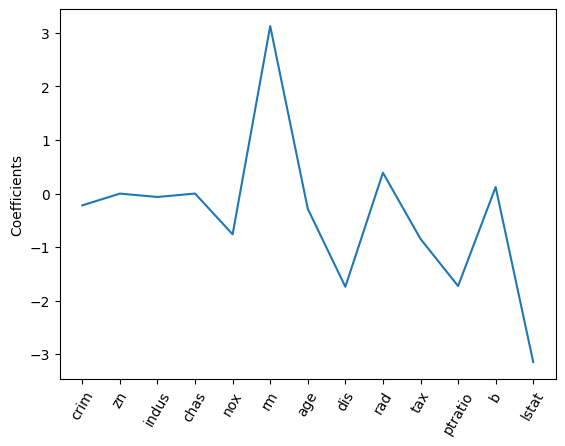

In [37]:
_=plt.plot(range(len(label)),coefficients)
_=plt.xticks(range(len(label)),label,rotation=60)
_=plt.ylabel("Coefficients")
plt.show()

# Data Modelling

### LazyRegressor

In [38]:
from lazypredict.Supervised import LazyRegressor

In [39]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

In [40]:
lasso_df.shape

(415, 12)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(lasso_df, labels, test_size=0.2, random_state=75)

In [42]:
models , predictions = reg.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 42/42 [00:04<00:00, 10.12it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.90,0.91,2.38,0.15
GradientBoostingRegressor,0.89,0.91,2.43,0.13
XGBRegressor,0.88,0.90,2.57,0.05
RandomForestRegressor,0.88,0.89,2.62,0.24
HistGradientBoostingRegressor,0.87,0.89,2.70,0.22
BaggingRegressor,0.85,0.87,2.92,0.03
LGBMRegressor,0.84,0.86,2.97,0.03
PoissonRegressor,0.83,0.85,3.09,0.01
KNeighborsRegressor,0.80,0.83,3.33,0.01


In [43]:
# print('Cross Val Score for Random Forest: ')
# result = cross_val_score(RandomForestRegressor(), xtrain, ytrain, cv=5, n_jobs=-1)
# print(np.mean(result))

### RandomForestRegressor

In [44]:
rf2 =  RandomForestRegressor(random_state=0)
rf2.fit(xtrain, ytrain)

y_pred = rf2.predict(xtest)

In [45]:
rf2.score(xtrain, ytrain)

0.9738110272112406

In [46]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
mape = np.mean(np.abs((ytest - y_pred) / np.abs(ytest)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 1.9194698795180722
Mean Squared Error (MSE): 6.358027180722891
Root Mean Squared Error (RMSE): 2.521512875383128
Mean Absolute Percentage Error (MAPE): 9.11
Accuracy: 90.89


In [47]:
lasso_df.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [48]:
feat_impo = pd.Series(rf2.feature_importances_, index=lasso_df.columns).sort_values()

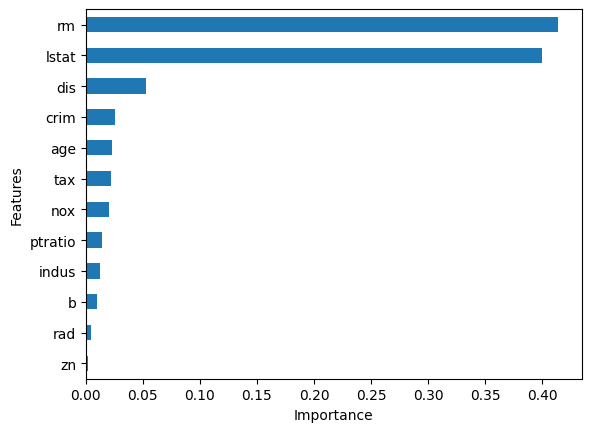

In [49]:
feat_impo.plot(kind="barh")
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [52]:
columns = []
scores = []

for column in (feat_impo.sort_values(ascending=False).index):
    columns.append(column)
    new_features = lasso_df[columns]

    xtrain, xtest, ytrain, ytest = train_test_split(new_features, labels, test_size=0.2, random_state=75)

    ss = StandardScaler()
    xtrain = ss.fit_transform(xtrain)

    rf2 =  RandomForestRegressor(random_state=0)
    rf2.fit(xtrain, ytrain)
    acc = rf2.score(xtest, ytest)
    scores.append(acc)

    print(f'Features: {columns}')
    print(acc)

Features: ['rm']
0.6235399327446816
Features: ['rm', 'lstat']
0.838487754469275
Features: ['rm', 'lstat', 'dis']
0.8681651821733345
Features: ['rm', 'lstat', 'dis', 'crim']
0.8610714850372809
Features: ['rm', 'lstat', 'dis', 'crim', 'age']
0.8648531739591833
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax']
0.8713372690432899
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox']
0.873952854627835
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio']
0.8934276823592822
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio', 'indus']
0.8924067170387817
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio', 'indus', 'b']
0.8870820420946256
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio', 'indus', 'b', 'rad']
0.8907552829756895
Features: ['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio', 'indus', 'b', 'rad', 'zn']
0.889988132560126


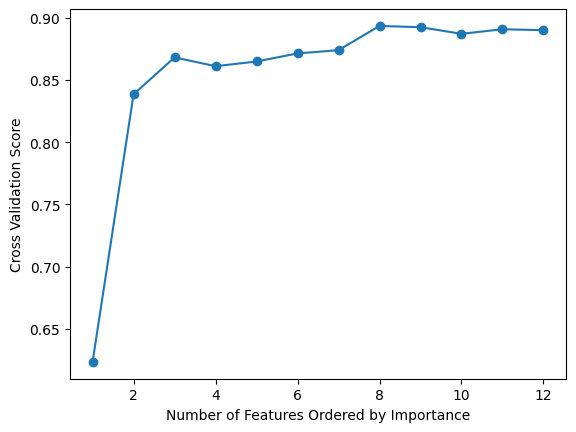

In [53]:
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Number of Features Ordered by Importance')
plt.ylabel('Cross Validation Score')
plt.show()

In [54]:
new_features = lasso_df[['rm', 'lstat', 'dis', 'crim', 'age', 'tax', 'nox', 'ptratio']]

xtrain, xtest, ytrain, ytest = train_test_split(new_features, labels, test_size=0.2, random_state=75)

ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)

rf2 =  RandomForestRegressor(random_state=0)
rf2.fit(xtrain, ytrain)

print(rf2.score(xtest, ytest))

0.8934276823592822


### Hyperparameter Tuning

In [55]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gscv = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [56]:
print(gscv.best_params_)
print(gscv.best_score_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.8333598538649701


In [57]:
print(gscv.best_estimator_.score(xtest, ytest))

0.8992941316354918


In [58]:
y_pred = rf2.predict(xtest)

In [59]:
answers = pd.DataFrame(ytest).reset_index()
answers.drop("index", axis=1, inplace=True)
prediction = pd.DataFrame(np.round(y_pred, decimals=1))
pred_compare = pd.concat([answers, prediction], axis=1)
pred_compare.columns = ["Labels", "Prediction"]

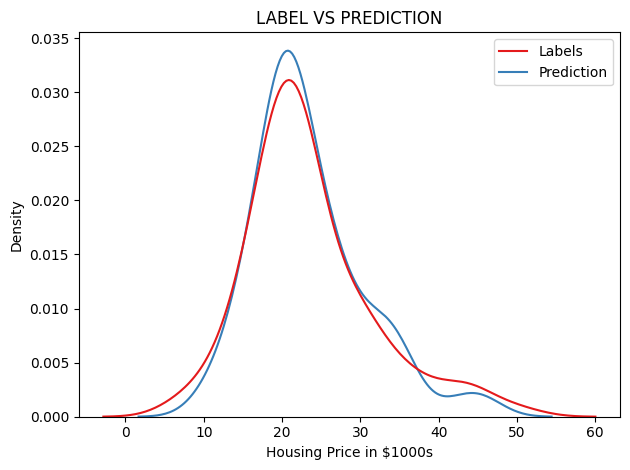

In [60]:
sns.kdeplot(data=pred_compare, palette="Set1")
plt.title("LABEL VS PREDICTION")
plt.xlabel("Housing Price in $1000s")
plt.tight_layout()
plt.savefig("model report.png", dpi=300)
plt.show()

In [61]:
joblib.dump(rf2, "model.pkl")

['model.pkl']

In [62]:
model = joblib.load("model.pkl")

In [63]:
print(f"Test Data Accuracy: {np.round(model.score(xtest, ytest)*100, decimals=2)} %")

Test Data Accuracy: 89.34 %


In [64]:
y_pred = model.predict(xtest)
r2 = r2_score(ytest, y_pred)*100
mse = mean_squared_error(ytest, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)

In [65]:
print('R2 Score :')
print(np.round(r2, decimals=2), "%")
print('RMSE Score :')
print(np.round(rmse, decimals=2))
print('MAE Score :')
print(np.round(mae, decimals=2))

R2 Score :
89.34 %
RMSE Score :
2.62
MAE Score :
1.93
